The Customer_Behavior file represents a data set which contains 400 observation and 5 characteristics of customers such as:     
Id, gender, Age, Salary and weather they purchased or not the company's new product.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# classification 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv('Customer_Behaviour.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.shape

(400, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
data.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

# Visualization

In [9]:
# target
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [10]:
# make boolean version of Purchased feature

data['Purchased_bool'] = data['Purchased'].apply(lambda x: True if x == 1 else False)

In [11]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased,Purchased_bool
0,15624510,Male,19,19000,0,False
1,15810944,Male,35,20000,0,False
2,15668575,Female,26,43000,0,False
3,15603246,Female,27,57000,0,False
4,15804002,Male,19,76000,0,False
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,True
396,15706071,Male,51,23000,1,True
397,15654296,Female,50,20000,1,True
398,15755018,Male,36,33000,0,False


In [12]:
purch_group = data.groupby('Purchased')['Purchased_bool'].count()
purch_group

Purchased
0    257
1    143
Name: Purchased_bool, dtype: int64

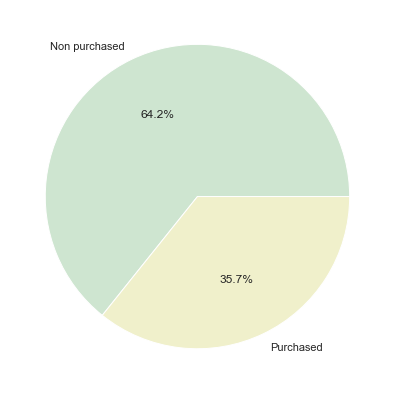

In [13]:
plt.figure(figsize = (7,7))
plt.pie(purch_group, autopct='%.1f%%', 
        labels = ['Non purchased', 'Purchased'], colors= ['#CEE5D0','#F0F0CB'])
plt.show()

In [14]:
# Purchased vs  Gender 

gender_group = data.groupby('Gender')['Purchased_bool'].count()
gender_group

Gender
Female    204
Male      196
Name: Purchased_bool, dtype: int64

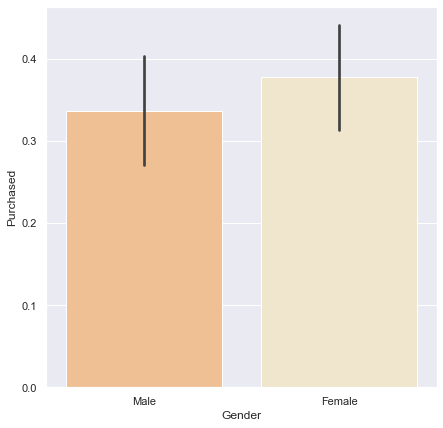

In [15]:
plt.figure(figsize = (7,7))
sns.barplot(data = data, x = 'Gender',y = 'Purchased', palette= ['#FFBF86', '#F5E8C7'])
plt.show()

남성보다 여성이 더 많이 구매를 하는 걸 알 수 있다


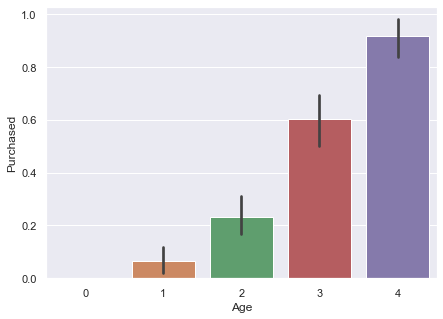

In [18]:
# Purchased vs  Age

## . Age is continuous feature --> mapping

dvis = data.copy()
for i, val in enumerate(dvis.Age):
    if (val>10) & (val<=20):
        dvis.loc[i,'Age'] = 0
    elif (val>20) & (val<=30):
        dvis.loc[i, 'Age'] = 1
    elif (val>30) & (val<=40):
        dvis.loc[i, 'Age'] = 2
    elif (val>40) & (val<=50):
        dvis.loc[i, 'Age'] = 3
    elif (val>50) & (val<=60):
        dvis.loc[i, 'Age'] = 4


plt.figure(figsize = (7,5))
sns.barplot(data = dvis, x = 'Age', y = 'Purchased')
plt.show()


나이가 많은 사람들은 젊은 사람들보다 많은 구매를 한다

## Correlation 

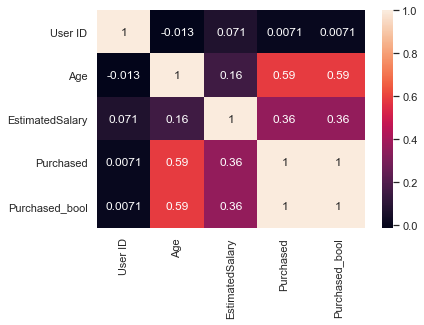

In [20]:
sns.heatmap(dvis.corr(), annot=True)
plt.show()

구매를 하는데 Age, Salary와 높은 상관관계를 가지지만        
Gender과는 거의 관련이 없다.
             

In [21]:
for col in data.columns:
    print(col, ':' , len(data[col].unique()))  

User ID : 400
Gender : 2
Age : 43
EstimatedSalary : 117
Purchased : 2
Purchased_bool : 2


# Preprocessing

In [24]:
def preprocessing_func(df):
    df = df.copy()
    
    # Drop nonrelative features
    df = df.drop(['User ID','Purchased_bool'], axis = 1)
    
    # Mapping --> Female = 0, Male = 1
    df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})
    
    
    # Feature Engineering - For Continous Age Feature
                      
    ### 1. Age mapping     
          
    ### 2. Age quatile
    old_age = df['Age'].quantile(.95)
    df['OldAge'] = df['Age'].apply(lambda x: 1 if x>= old_age else 0 )
            
    young_age = df['Age'].quantile(.1)
    df['YoungAge'] = df['Age'].apply(lambda x: 1 if x<= young_age else 0 )
              
#     ### 3. Age getdummies = OneHotEncode
#     dummies = pd.get_dummies(dd.Age)
#     df = pd.concat([df,dummies], axis = 1)
#     df = df.drop('Age', axis = 1)
    
            
    # quantile also is technique for continous features

    high_salary = df.EstimatedSalary.quantile(q = .9)
    df['HighSalary'] = df['EstimatedSalary'].apply(lambda x: 1 if x>= high_salary else 0)
    
    low_salary = df.EstimatedSalary.quantile(q = .15)
    df['LowSalary'] = df['EstimatedSalary'].apply(lambda x: 1 if x<= low_salary else 0)
    
    
    X = df.drop('Purchased', axis  =1)
    y = df.Purchased
    
    # Scale     
    X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns = X.columns)
    
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.8, random_state=0)
    
    return   X_train, X_test, y_train, y_test 

In [25]:
X_train, X_test, y_train, y_test  = preprocessing_func(data)
X_train

,Gender,Age,EstimatedSalary,OldAge,YoungAge,HighSalary,LowSalary
336,1.0,0.952381,0.955556,1.0,0.0,1.0,0.0
64,0.0,0.976190,0.503704,1.0,0.0,0.0,0.0
55,0.0,0.142857,0.296296,0.0,1.0,0.0,0.0
106,0.0,0.190476,0.148148,0.0,0.0,0.0,0.0
300,0.0,0.952381,0.170370,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
323,0.0,0.714286,0.111111,0.0,0.0,0.0,1.0
192,1.0,0.261905,0.207407,0.0,0.0,0.0,0.0
117,1.0,0.428571,0.274074,0.0,0.0,0.0,0.0
47,0.0,0.214286,0.288889,0.0,0.0,0.0,0.0


# Model & Train

In [26]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)
accuracy_score(y_pred, y_test)*100

96.25

In [28]:
models = {
    ' logistic Regr': LogisticRegression(),
    '           SVC':SVC(),
    'Neural Network': MLPClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name, ' is trained! ')

 logistic Regr  is trained! 
           SVC  is trained! 
Neural Network  is trained! 


C:\Users\admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name,' accuracy {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))

 logistic Regr  accuracy 95.00%
           SVC  accuracy 96.25%
Neural Network  accuracy 96.25%


# Age is mapped  [10~20 = 0...]
# Try 1:
####  Without any scaling
    kn = 81.25%       
    logistic Regr  accuracy = 72.50%
    SVC  accuracy = 81.25%
    Neural Network  accuracy = 72.50%
    
# Try 2:
#### Standard Scaling
    kn = 93.75%       
    logistic Regr  accuracy = 93.75%
    SVC  accuracy = 95.00%
    Neural Network  accuracy = 95.00%
    
# Try 3:
#### MinMaxScaling
    kn = 93.75%       
    logistic Regr  accuracy = 95.00%
    SVC  accuracy = 95.00%
    Neural Network  accuracy = 95.00%
    
=======================================================================
# Age is just quantiled [oldAge , youngAge]
# Try1
####  Without any scaling
    kn = 82.5%       
    logistic Regr  accuracy = 72.50%
    SVC  accuracy = 81.25%
    Neural Network  accuracy = 72.50%

    
# Try 2:
#### MinMaxScaling
    kn = 96.25%%       
    logistic Regr  accuracy = 95.00%
    SVC  accuracy = 96.25%%
    Neural Network  accuracy = 96.25%
    
=====================================================================
# Age got onehot encoded 

    
#### MinMaxScaling
    kn = 86.25%       
    logistic Regr  accuracy = 88.75%
    SVC  accuracy = 91.25%
    Neural Network  accuracy = 88.75%
    
    
##### ==> for this dataset the highest score was : when Age is quantiled & data is MinMaxScaled :: SVC, Neural Network  are better  models for this data
                    